In [17]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics and modeling
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Missing value handling and imputation
from sklearn.impute import SimpleImputer

# Advanced visualization (optional)
import plotly.express as px
import plotly.graph_objects as go

In [18]:
stats_df = pd.read_csv('../Data/2021-2022 Football Player Stats.csv', sep = ';', encoding_errors = 'ignore')
unclassified_data = pd.read_csv('../Data/player-data/player-combined-data.csv')

In [21]:
print("Stats Dataset Info:")
print(stats_df.info())
print("\nGeneral Dataset Info:")
print(general_df.info())

Stats Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Columns: 143 entries, Rk to AerWon%
dtypes: float64(133), int64(5), object(5)
memory usage: 3.2+ MB
None

General Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635 entries, 0 to 8634
Data columns (total 77 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   player_name                        8635 non-null   object 
 1   home_team                          8635 non-null   object 
 2   away_team                          8635 non-null   object 
 3   year                               8635 non-null   int64  
 4   team                               8635 non-null   object 
 5   Match                              8635 non-null   object 
 6   Competition                        8635 non-null   object 
 7   Date                               8635 non-null   object 
 8   Position                  

In [22]:
print("\nStats Dataset Summary:")
print(stats_df.describe())
print("\nGeneral Dataset Summary:")
print(general_df.describe())


Stats Dataset Summary:
                Rk          Age         Born           MP       Starts  \
count  2921.000000  2920.000000  2921.000000  2921.000000  2921.000000   
mean   1461.000000    26.092123  1994.725094    18.800068    13.749743   
std     843.364393     4.641746    37.210426    11.619882    11.393763   
min       1.000000    16.000000     0.000000     1.000000     0.000000   
25%     731.000000    23.000000  1992.000000     8.000000     3.000000   
50%    1461.000000    26.000000  1996.000000    20.000000    12.000000   
75%    2191.000000    29.000000  1999.000000    29.000000    23.000000   
max    2921.000000    41.000000  2006.000000    38.000000    38.000000   

               Min          90s        Goals        Shots          SoT  ...  \
count  2921.000000  2921.000000  2921.000000  2921.000000  2921.000000  ...   
mean   1234.756248    13.719069     0.111274     1.220431     0.391462  ...   
std     977.941288    10.865255     0.233688     1.511266     0.784754  

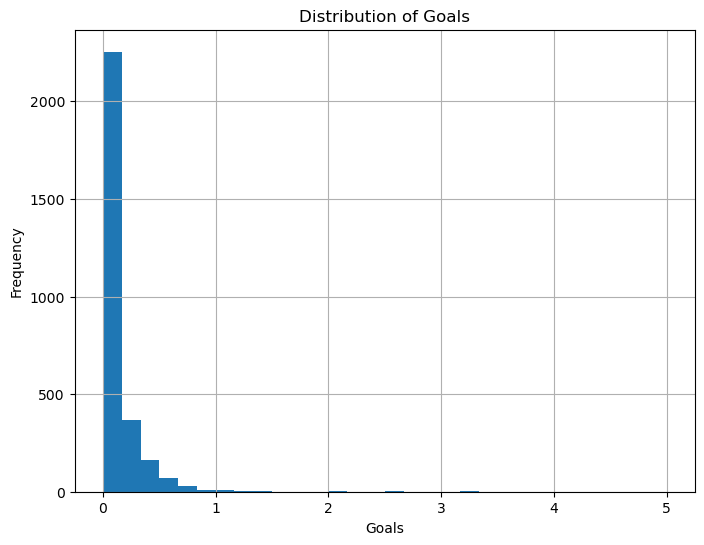

In [23]:
plt.figure(figsize=(8, 6))
stats_df['Goals'].hist(bins=30)
plt.title('Distribution of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

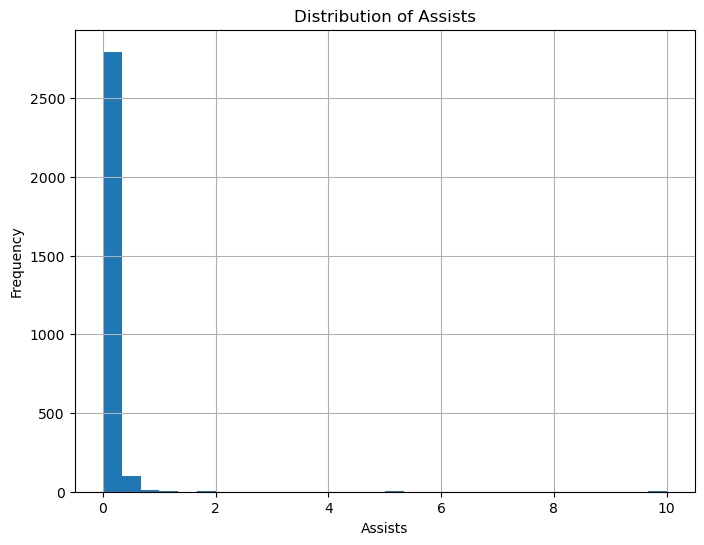

In [24]:
plt.figure(figsize=(8, 6))
stats_df['Assists'].hist(bins=30)
plt.title('Distribution of Assists')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.show()

In [26]:
correlation = stats_df[['Goals', 'Assists']].corr()
print("\nCorrelation Between Goals and Assists:")
print(correlation)


Correlation Between Goals and Assists:
            Goals   Assists
Goals    1.000000  0.069223
Assists  0.069223  1.000000


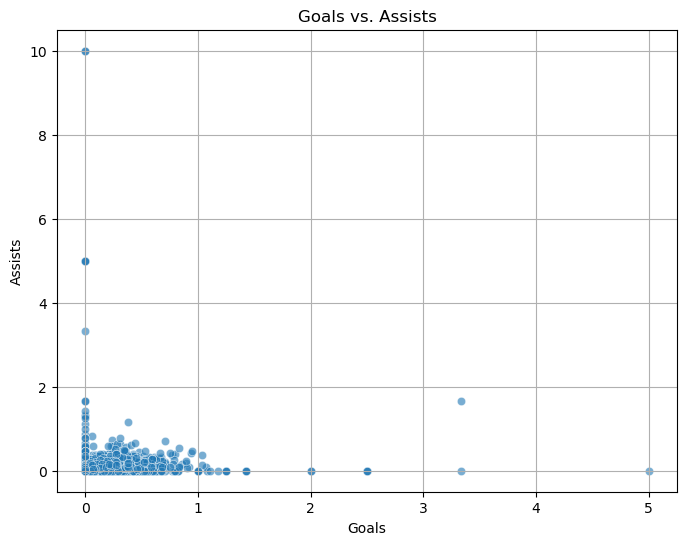

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Goals', y='Assists', data=stats_df, alpha=0.6)
plt.title('Goals vs. Assists')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.grid(True)
plt.show()


Average Goals and Assists by Position:
         Goals   Assists
Pos                     
FW    0.292482  0.143842
FWMF  0.231466  0.138046
FWDF  0.160000  0.085667
MFFW  0.152594  0.133347
MF    0.074348  0.081254
MFDF  0.058824  0.123971
DFFW  0.052000  0.086857
DFMF  0.045909  0.078030
DF    0.039108  0.059628
GK    0.000000  0.002315
GKMF  0.000000  0.000000


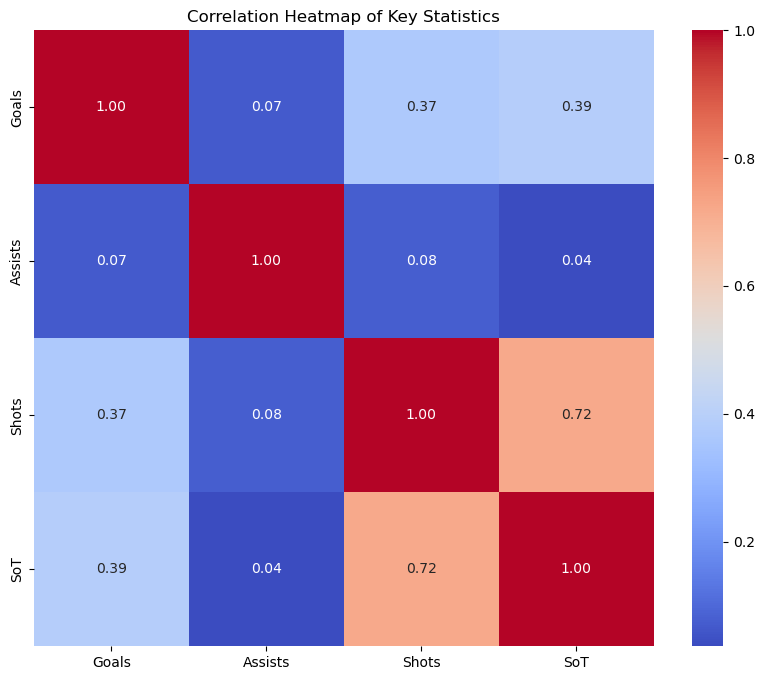

In [28]:
performance_by_position = stats_df.groupby('Pos')[['Goals', 'Assists']].mean().sort_values(by='Goals', ascending=False)
print("\nAverage Goals and Assists by Position:")
print(performance_by_position)

# Heatmap - Correlation of Key Variables (Subset)
key_stats = ['Goals', 'Assists', 'Shots', 'SoT', 'Passes Completed', 'Passes Attempted']
key_stats = [col for col in key_stats if col in stats_df.columns]
if key_stats:
    plt.figure(figsize=(10, 8))
    sns.heatmap(stats_df[key_stats].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Key Statistics')
    plt.show()